# Visualizacion de relaciones societarias en grafos
# Proyecto de oscuridad SII

### Henry Vega, Physicist and Data Scientist


## Descripcion
En este notebook se presenta una forma de visualizacion de las relaciones de una sociedad con sus socios o bien como participante accionario de otras sociedades. Se presenta tambien un codigo de color que aya a visualizar el peso procentual de dicahs relaciones. 

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


Primero se carga la database con las relaciones societarias procesadas.

In [2]:
data= pd.read_csv('/home/cdsw/data/processed/sociedades_participacion_capital_nozero.csv')
data.head(10)

,RUT_SOCIEDAD,RUT_SOCIO,PORCENTAJE_CAPITAL,PORCENTAJE_UTILIDADES
0,dwElNqcCQQiFyI3icvEMrA==,dwElNqcCQQiFyI3icvEMrA==,100.00,100.00
1,E81vZtfA4Ybc4DMafqcW+g==,3BC/zRqDU+1GjN2KsR/Wxg==,99.00,99.00
2,2AlrCTNxh4TadQyxCtt94w==,d4QdUJK8I1t8jAjfbmuF2g==,70.00,70.00
3,tC5mxZiKq7cNSWyNF3Oz2Q==,C4poSpbJFI6kSghEqd+Qfg==,0.01,0.01
4,E81vZtfA4Ybc4DMafqcW+g==,8pRJYqtj522N9P1N80998Q==,1.00,1.00
5,2AlrCTNxh4TadQyxCtt94w==,I/YkZE/cZA9DBuO7E2YWEw==,30.00,30.00
6,tC5mxZiKq7cNSWyNF3Oz2Q==,LIkmP/LOUl9ME922f5gLHA==,99.99,99.99
7,bScznJ1Sj7Hz8PkYxW+DIQ==,OLHNNaqwBijGGwRxH33p5A==,99.72,99.72
8,J0MTHUaWHVxIuRb23j2LUg==,4LWmtLgt7WF7AoW15PK4cA==,35.03,35.03
9,J0MTHUaWHVxIuRb23j2LUg==,G4T2ebnr0zFDJzE31Auetg==,0.04,0.04


Ingresamos el rut de la entidad encriptado (o no, dependiendo del caso). Los que haremos es selecciconar todas las entradas de la data que coincidan con la entidad. 


In [3]:
entidad='1/fiLcJsRImVrEWJdHkupg=='

In [4]:
data=data[(data['RUT_SOCIEDAD']==entidad) | (data['RUT_SOCIO']==entidad)]

Veamos ahora la tabla resultante del filtro de la entidad. 

In [5]:
data

,RUT_SOCIEDAD,RUT_SOCIO,PORCENTAJE_CAPITAL,PORCENTAJE_UTILIDADES
11,apIKKxuW6vzI+5w3CoVXPA==,1/fiLcJsRImVrEWJdHkupg==,51.00,51.0
214520,a3E21PSlWL6JLBRx5ZQLUg==,1/fiLcJsRImVrEWJdHkupg==,40.00,40.0
343480,pbwdA+7vV4eDBfZiHCN0tQ==,1/fiLcJsRImVrEWJdHkupg==,13.40,13.4
1099338,E4YEobhrkptSX0NtbxKm0Q==,1/fiLcJsRImVrEWJdHkupg==,55.56,20.0


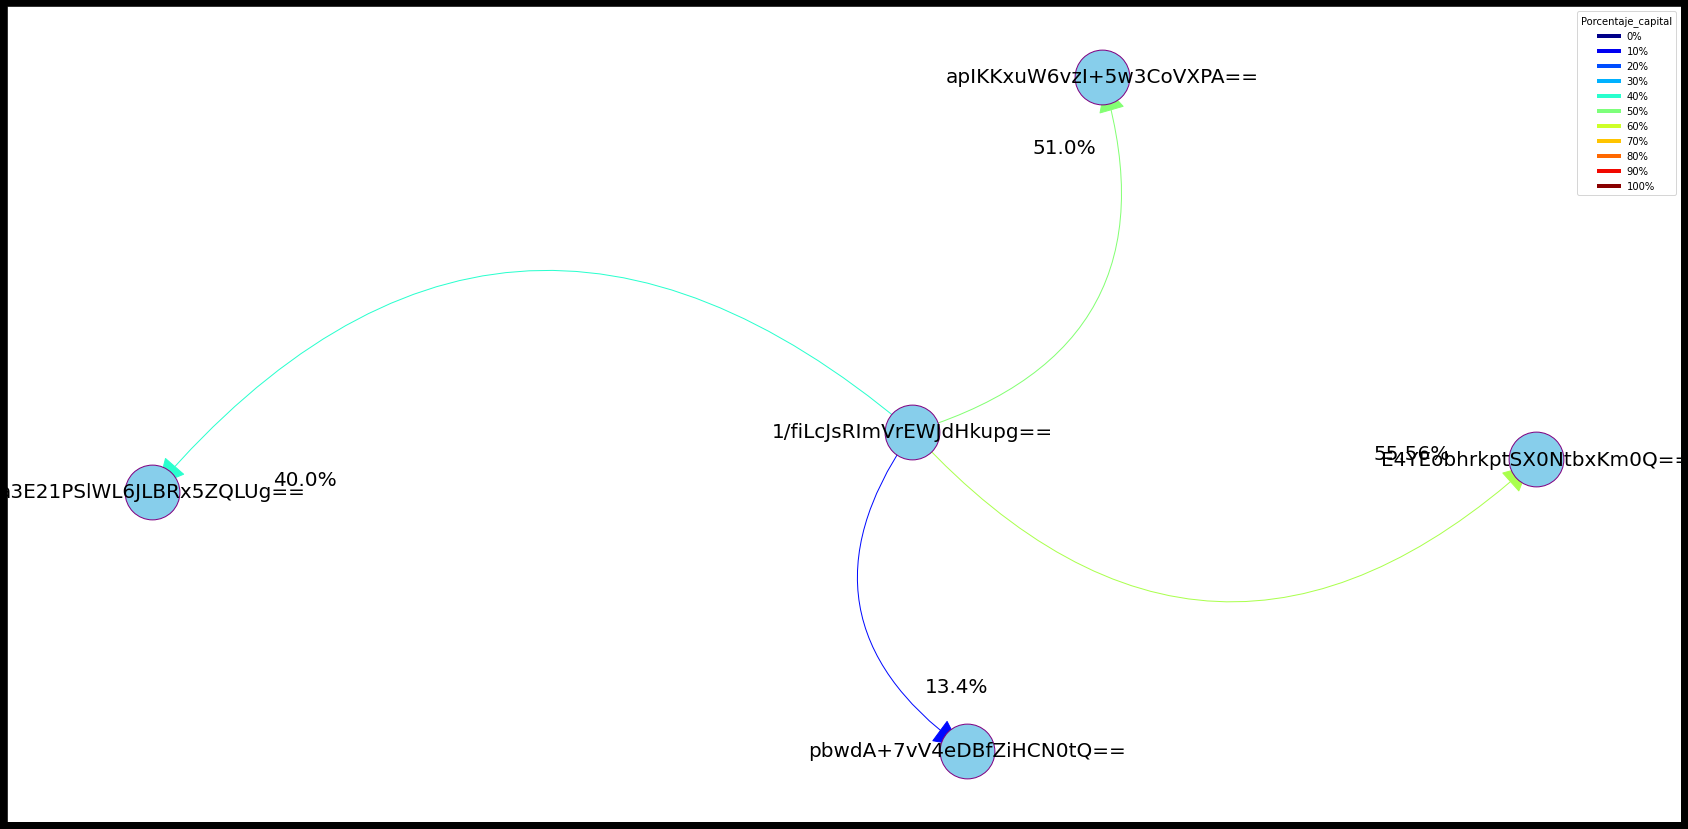

In [6]:


# Supongamos que ya tienes los datos en un DataFrame llamado "data"
# ... (código para cargar los datos en un DataFrame llamado "data")

# Creación del grafo
G = nx.from_pandas_edgelist(data, source='RUT_SOCIO', target='RUT_SOCIEDAD', edge_attr='PORCENTAJE_CAPITAL', create_using=nx.DiGraph(), edge_key='arco')

# Calcula el color de las flechas basado en la columna "PORCENTAJE_CAPITAL"
edge_colors = [plt.cm.jet(d['PORCENTAJE_CAPITAL'] / 100) for u, v, d in G.edges(data=True)]

# Configuración del diseño y tamaño del gráfico
pos = nx.spring_layout(G, scale=12)
plt.figure(figsize=(30, 15), facecolor='black')

# Dibuja nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=3000, edgecolors='purple')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=20)

# Dibuja las flechas con colores basados en los valores de "PORCENTAJE_CAPITAL"
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, connectionstyle='arc3, rad=0.5', arrows=True, arrowsize=60)

# Etiquetas de las flechas con los valores de PORCENTAJE_CAPITAL
edge_labels = {(u, v): f"{d['PORCENTAJE_CAPITAL']}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black',label_pos=0.2,font_size=20
,horizontalalignment= 'center',verticalalignment='center',rotate
=False

)

# Crea una leyenda personalizada
legend_elements = [Line2D([0], [0], color=plt.cm.jet(0.01), lw=4, label='0%'),
                   Line2D([0], [0], color=plt.cm.jet(0.1), lw=4, label='10%'),
                   Line2D([0], [0], color=plt.cm.jet(0.2), lw=4, label='20%'),
                   Line2D([0], [0], color=plt.cm.jet(0.3), lw=4, label='30%'),                   
                   Line2D([0], [0], color=plt.cm.jet(0.4), lw=4, label='40%'),
                   Line2D([0], [0], color=plt.cm.jet(0.5), lw=4, label='50%'),
                   Line2D([0], [0], color=plt.cm.jet(0.6), lw=4, label='60%'),
                   Line2D([0], [0], color=plt.cm.jet(0.7), lw=4, label='70%'),
                   Line2D([0], [0], color=plt.cm.jet(0.8), lw=4, label='80%'),
                   Line2D([0], [0], color=plt.cm.jet(0.9), lw=4, label='90%'),
                   Line2D([0], [0], color=plt.cm.jet(0.99), lw=4, label='100%'),
                  ]


plt.legend(handles=legend_elements, loc='best', title='Porcentaje_capital')
plt.show()


En el grafico anterior, se presentan los socios que componen la sociedad en cuestion y tambien las conexiones que tiene dicha sociedad como socio de otras entidades.